In [35]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [36]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [37]:
data = pd.read_excel('data.xlsx', sheet_name="Konya", index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,193,92198.0400,51865.8000,2262.7900,5.1,0.8,-6.4,-12.7,-3.0,-2.1,...,20.9,14.7,8.3,4.0,1.9,4.5,7.6,13.1,17.6,21.6
2005,173,92635.4100,47814.6600,2410.1000,11.7,8.8,2.4,-1.6,-0.2,-1.2,...,20.9,14.7,8.3,4.0,1.9,4.5,7.6,13.1,17.6,21.6
2006,248,92765.8730,51580.7260,2529.1600,12.3,6.2,2.1,-0.9,-4.1,-1.7,...,27.4,32.2,53.4,7.2,12.8,18.4,24.6,44.2,22.0,10.4
2007,159,89000.0445,41624.0805,3727.0105,13.3,9.7,1.3,-2.5,-3.0,-2.6,...,24.2,55.0,53.0,0.0,22.2,13.8,7.4,19.4,6.4,19.2
2008,160,80873.2555,32705.1475,7276.7545,14.1,9.0,3.9,-0.8,-5.7,-5.5,...,1.4,8.8,69.2,58.4,10.4,20.4,47.6,15.6,37.6,14.2


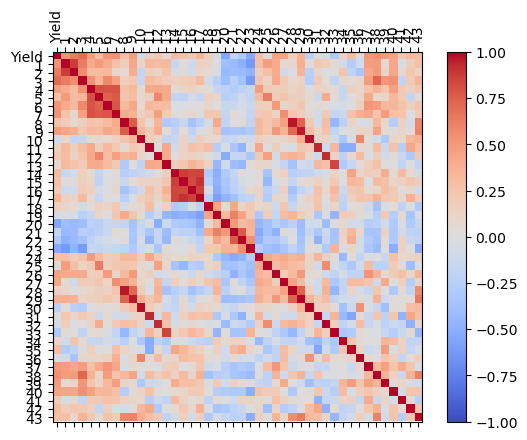

In [38]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

On this example, when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

In [39]:
corr

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Yield,1.000000,0.526323,0.628698,0.699251,0.476140,0.285974,0.518061,0.524985,0.272566,0.474398,...,0.124094,0.293020,-0.033275,0.500754,0.541667,0.476861,0.444128,0.200929,0.300683,0.281828
1,0.526323,1.000000,0.867572,0.625813,0.405339,0.485435,0.401727,0.260427,0.172666,0.424420,...,-0.075027,-0.275206,-0.078631,0.474839,0.481915,0.060467,0.429252,-0.045167,0.176928,0.271462
2,0.628698,0.867572,1.000000,0.556339,0.299328,0.307514,0.327390,0.084515,0.056197,0.394025,...,0.235337,-0.206766,-0.338736,0.421971,0.488280,0.111458,0.427710,0.079639,0.229638,0.109664
3,0.699251,0.625813,0.556339,1.000000,0.532039,0.344305,0.577946,0.456249,0.151150,0.233481,...,0.078994,0.024161,0.104133,0.479735,0.719547,0.515249,0.543834,-0.173660,0.204314,0.350834
4,0.476140,0.405339,0.299328,0.532039,1.000000,0.797121,0.790259,0.802563,0.265176,0.324353,...,-0.149856,0.163241,0.094994,0.270666,0.372637,0.243509,0.463326,0.200054,0.140841,0.211969
5,0.285974,0.485435,0.307514,0.344305,0.797121,1.000000,0.741256,0.772052,0.243170,0.304695,...,-0.147022,0.014511,0.114083,0.412356,0.092496,0.111200,0.332111,0.198449,-0.175674,0.042325
6,0.518061,0.401727,0.327390,0.577946,0.790259,0.741256,1.000000,0.785204,0.312847,0.424842,...,-0.062958,-0.003019,0.155109,0.521535,0.473271,0.326183,0.342721,0.267225,0.154655,0.253416
7,0.524985,0.260427,0.084515,0.456249,0.802563,0.772052,0.785204,1.000000,0.403482,0.363511,...,-0.132445,0.272417,0.376022,0.427742,0.246177,0.476225,0.274847,0.242726,-0.014170,0.192334
8,0.272566,0.172666,0.056197,0.151150,0.265176,0.243170,0.312847,0.403482,1.000000,0.761596,...,-0.238367,0.119330,-0.018972,-0.032280,0.329687,0.094454,-0.270564,0.134550,-0.058788,0.583816
9,0.474398,0.424420,0.394025,0.233481,0.324353,0.304695,0.424842,0.363511,0.761596,1.000000,...,-0.017541,0.017054,0.123158,0.089267,0.442919,0.062179,0.028426,0.094344,0.034676,0.595435


In [40]:
import pmdarima as pm


In [41]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame()

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [42]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -2.682558
p-value: 0.077105
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661
Non-stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: -0.805873
p-value: 0.817391
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Non-stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: -0.349646
p-value: 0.918173
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Non-stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: -4.491100
p-value: 0.000204
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: -5.895860
p-value: 0.000000
Critical Values:
	1%: -3.859
	5%: -3

C:\Users\Cevher\AppData\Local\Temp\ipykernel_9204\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [43]:
data = data.diff(1)
data = data.dropna()
data.head()


,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2005,-20.0,437.3700,-4051.1400,147.3100,6.6,8.0,8.8,11.1,2.8,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006,75.0,130.4630,3766.0660,119.0600,0.6,-2.6,-0.3,0.7,-3.9,-0.5,...,6.5,17.5,45.1,3.2,10.9,13.9,17.0,31.1,4.4,-11.2
2007,-89.0,-3765.8285,-9956.6455,1197.8505,1.0,3.5,-0.8,-1.6,1.1,-0.9,...,-3.2,22.8,-0.4,-7.2,9.4,-4.6,-17.2,-24.8,-15.6,8.8
2008,1.0,-8126.7890,-8918.9330,3549.7440,0.8,-0.7,2.6,1.7,-2.7,-2.9,...,-22.8,-46.2,16.2,58.4,-11.8,6.6,40.2,-3.8,31.2,-5.0
2009,100.0,25425.0195,34833.0735,1075.6635,0.9,-1.2,0.5,-0.9,4.6,6.3,...,50.2,18.6,-52.4,-3.0,53.0,23.8,-26.0,41.2,-3.8,-6.0


In [44]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -4.687144
p-value: 0.000089
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: -6.137199
p-value: 0.000000
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: -93.719656
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: -0.740873
p-value: 0.835877
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Non-stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: -2.957133
p-value: 0.039096
Critical Values:
	1%: -4.012
	5%: -3.104
	1

C:\Users\Cevher\AppData\Local\Temp\ipykernel_9204\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [45]:
# scaler = MinMaxScaler()
# data = data['Yield'].to_numpy()
# data = data.reshape(-1, 1)
# scaler.fit(data)
# sonuc = scaler.transform(data)

for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_9204\4229674204.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [46]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2005,0.333333,0.526194,0.376985,0.598297,1.000000,1.000000,1.000000,1.000000,0.638889,0.507463,...,0.430839,0.451128,0.512605,0.560598,0.456140,0.537525,0.464191,0.563559,0.660040,0.380615
2006,0.792271,0.524516,0.502235,0.595769,0.411765,0.196970,0.372414,0.377246,0.018519,0.402985,...,0.504535,0.560777,0.828431,0.577683,0.529690,0.678499,0.689655,0.893008,0.703777,0.292356
2007,0.000000,0.503214,0.282365,0.692305,0.450980,0.659091,0.337931,0.239521,0.481481,0.373134,...,0.394558,0.593985,0.509804,0.522157,0.519568,0.490872,0.236074,0.300847,0.504970,0.449961
2008,0.434783,0.479372,0.298992,0.902765,0.431373,0.340909,0.572414,0.437126,0.129630,0.223881,...,0.172336,0.161654,0.626050,0.872397,0.376518,0.604462,0.997347,0.523305,0.970179,0.341214
2009,0.913043,0.662809,1.000000,0.681371,0.441176,0.303030,0.427586,0.281437,0.805556,0.910448,...,1.000000,0.567669,0.145658,0.544581,0.813765,0.778905,0.119363,1.000000,0.622266,0.333333


In [47]:
train = data[:15]
test = data[15:]

In [48]:
arima = pm.auto_arima(train['Yield'],X=train.drop(columns=['Yield']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,1,1)[4]             : AIC=-77.124, Time=1.36 sec
 ARIMA(0,2,0)(0,1,0)[4]             : AIC=-77.461, Time=1.56 sec
 ARIMA(1,2,0)(1,1,0)[4]             : AIC=8.847, Time=0.91 sec
 ARIMA(0,2,1)(0,1,1)[4]             : AIC=-71.812, Time=2.01 sec
 ARIMA(0,2,0)(1,1,0)[4]             : AIC=-74.612, Time=2.61 sec
 ARIMA(0,2,0)(0,1,1)[4]             : AIC=-74.462, Time=1.73 sec
 ARIMA(0,2,0)(1,1,1)[4]             : AIC=-73.722, Time=1.62 sec
 ARIMA(1,2,0)(0,1,0)[4]             : AIC=90.000, Time=0.04 sec
 ARIMA(0,2,1)(0,1,0)[4]             : AIC=-74.894, Time=1.14 sec
 ARIMA(1,2,1)(0,1,0)[4]             : AIC=-73.765, Time=2.37 sec
 ARIMA(0,2,0)(0,1,0)[4] intercept   : AIC=-72.253, Time=1.13 sec

Best model:  ARIMA(0,2,0)(0,1,0)[4]          
Total fit time: 16.533 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:         

In [49]:
pred=arima.predict(n_periods=3, X=test.drop(columns=['Yield']), alpha=0.05)
pred

C:\Users\Cevher\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


15    0.177413
16    0.301355
17    0.467121
dtype: float64

In [50]:
test

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2020,0.420290,1.000000,0.768950,1.000000,0.343137,0.439394,0.462069,0.365269,0.444444,0.373134,...,0.492063,0.211779,0.624650,0.792312,0.429150,0.711968,0.708223,0.669492,0.964215,0.382191
2021,0.280193,0.000000,0.000000,0.318071,0.607843,0.424242,0.275862,0.413174,0.500000,0.402985,...,0.430839,0.486216,0.376751,0.000000,0.233468,0.239351,0.713528,0.491525,0.314115,0.508274
2022,0.714976,0.556312,0.662179,0.940386,0.000000,0.121212,0.531034,0.167665,0.000000,0.402985,...,0.693878,0.374687,0.557423,0.904431,0.807018,0.902637,0.347480,0.262712,0.910537,0.292356


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


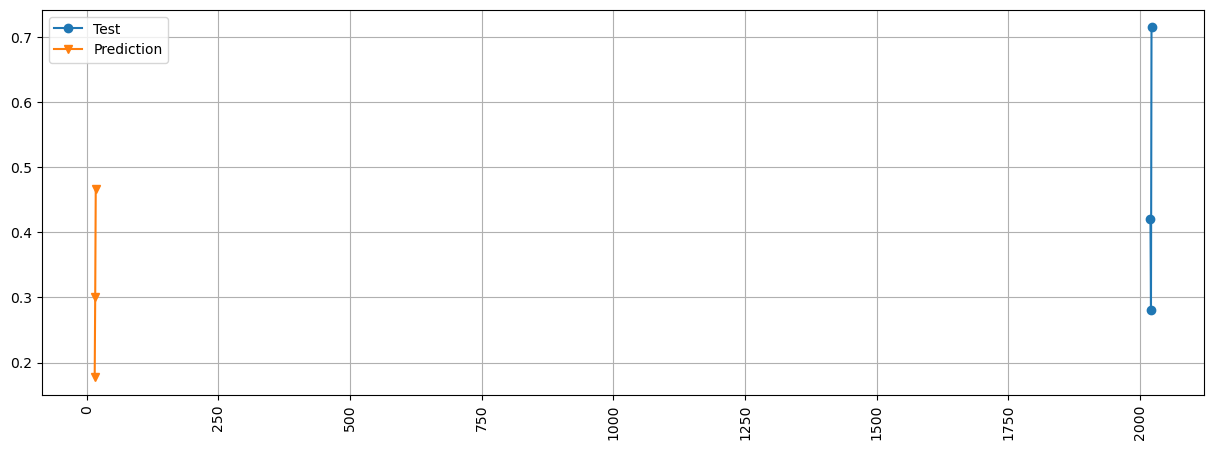

Mean Absolute Error 0.1706309567813741
Mean Squared Error 0.04028958942487459
RMSE 0.2007226679398084
AIC values -77.46059301976624


In [52]:
plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(test['Yield'], marker='o', label='Test')
plt.plot(pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_error(test['Yield'], pred)
print("Mean Absolute Error", mape)
print("="*50)
mse=mean_squared_error(test['Yield'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)
